In [56]:
import importlib
import numpy as np
import os
from skimage import io
import Texture_Functions
importlib.reload(Texture_Functions)

import mahotas
from mahotas import features
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix
from PIL import Image, ImageDraw
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import random


## OCT Data-

In [6]:
#working with OCT image set-
dir_path = r"C:\Users\justinamb\Desktop\OCTSlices2"

# Change the directory 
os.chdir(dir_path) 

imageset=[]
# iterate through all file 
for file in os.listdir(): 
    # Check whether file is in text format or not 
    pic = np.array(io.imread(file))
    imageset.append(pic)

In [9]:
featlist=[]
indexlist=[]
for f in range(len(imageset)):
    imup=imageset[f]
    if len(imup.shape)>2:
        imup=imup[:,:,0]
    imup=imup-np.min(imup)
    imup=imup/np.max(imup)*255
    #print(np.ptp(imup))
    
    minval=0
    imup=np.where(imup>minval,imup,minval)
    imup=imup-minval
    imup=(imup/np.max(imup))*255
       
    #Gonna divide it up into chunks-
    squaresize=256
    for j in range(int(np.floor(imup.shape[0]/squaresize))):
        for k in range(int(np.floor(imup.shape[1]/squaresize))):
            chunk=imup[j*squaresize:(j+1)*squaresize,k*squaresize:(k+1)*squaresize]
            chunk = chunk.astype(np.uint8)
            #Check to see how many zeros there are-
            if np.count_nonzero(chunk==0)<30000:
                #Check for oversaturation-
                oversatchtestchunk=chunk+1
                oversatchtestchunk=np.where(oversatchtestchunk==256,0,oversatchtestchunk)
                if np.count_nonzero(oversatchtestchunk==0)<1000:
                    features=mahotas.features.haralick(chunk, preserve_haralick_bug=False, compute_14th_feature=True, ignore_zeros=True,  use_x_minus_y_variance=True)
                    featlist.append(features)
                    indexochunk=[f,j,k]
                    indexlist.append(indexochunk)

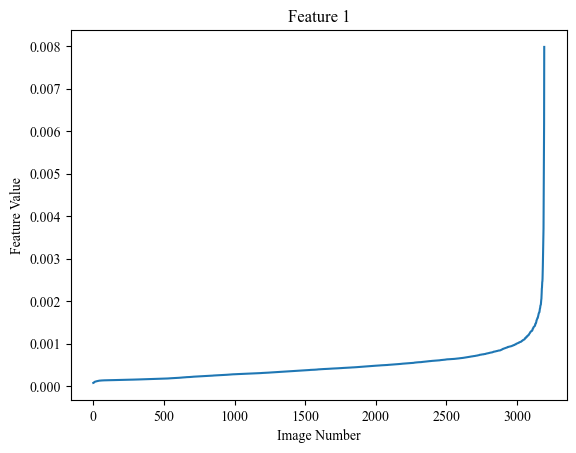

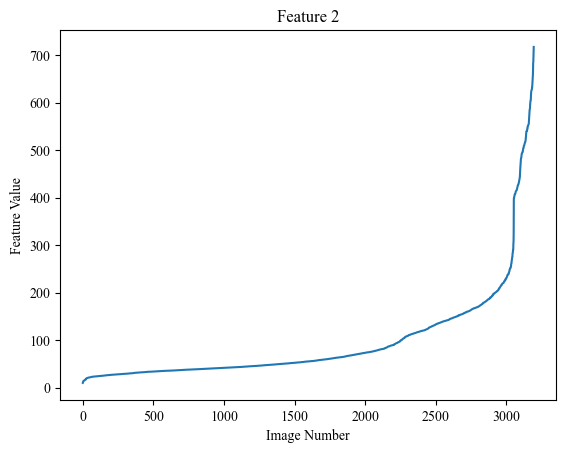

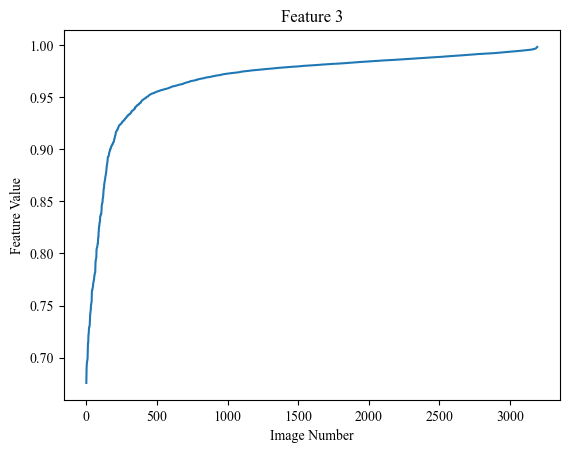

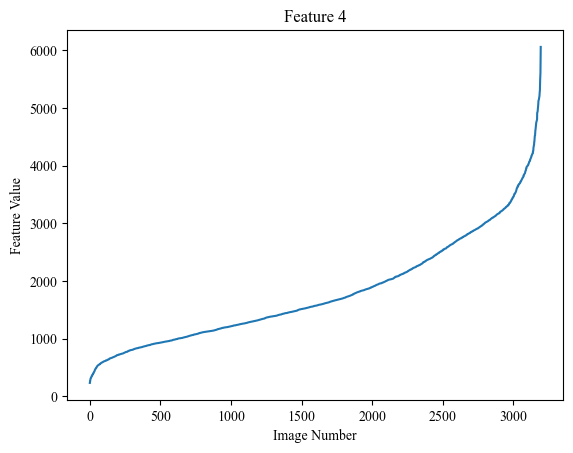

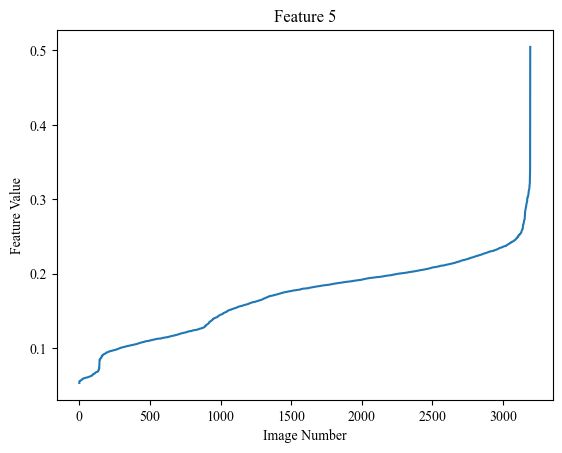

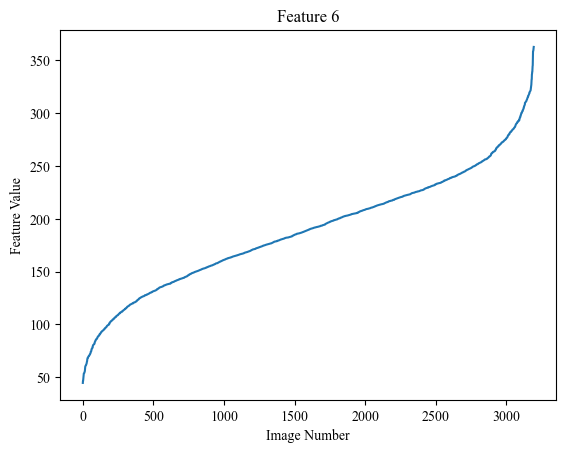

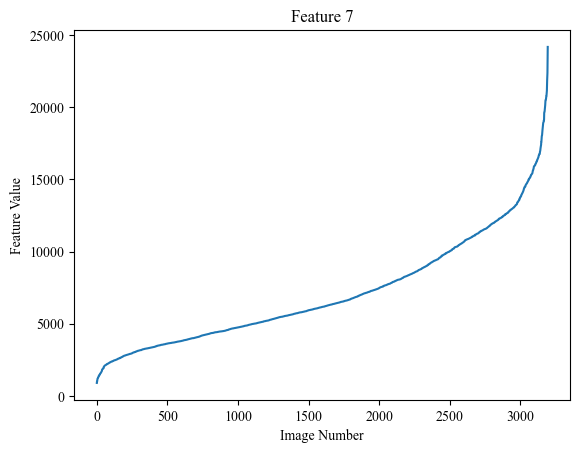

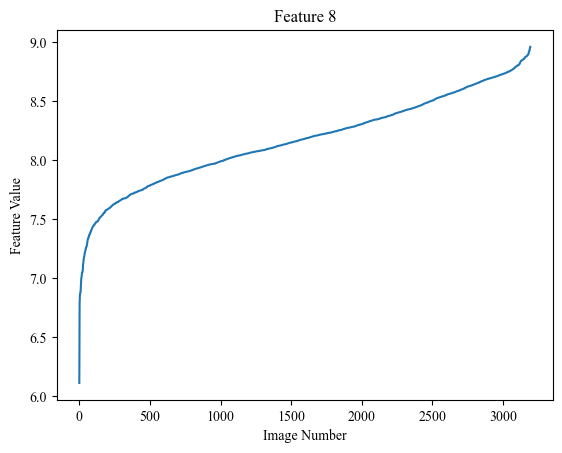

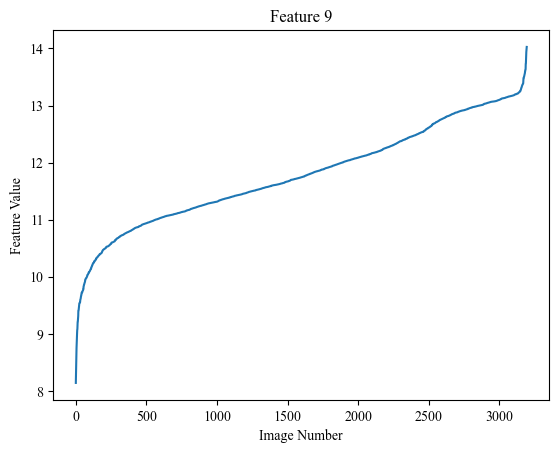

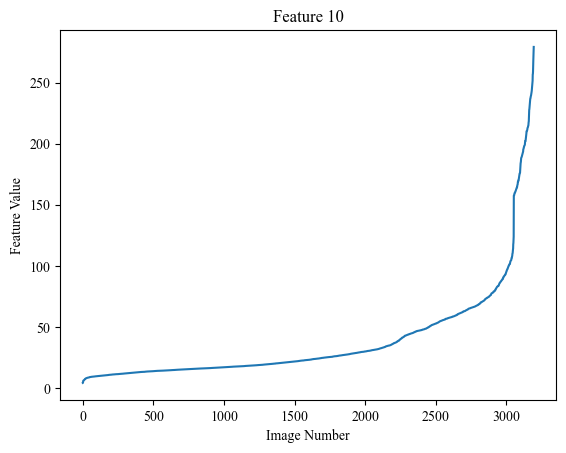

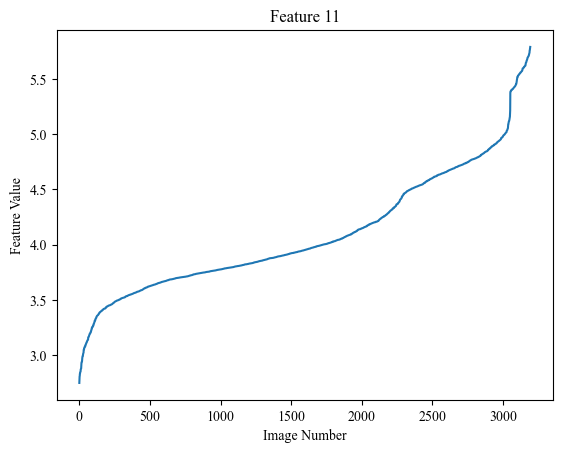

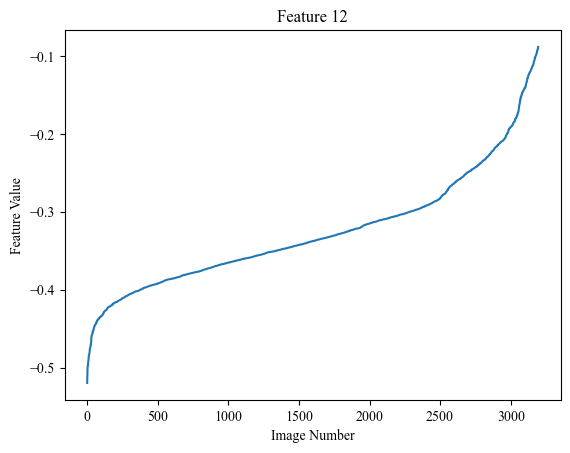

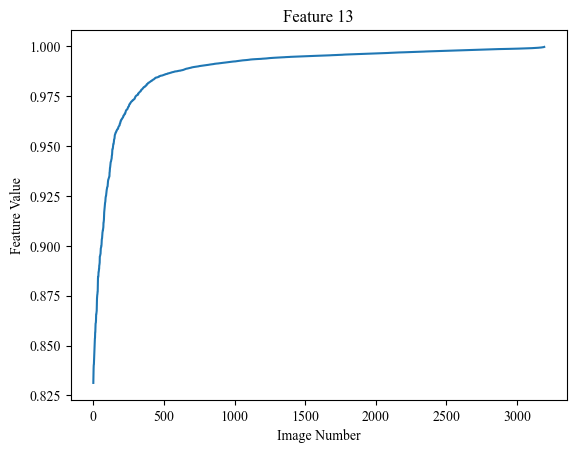

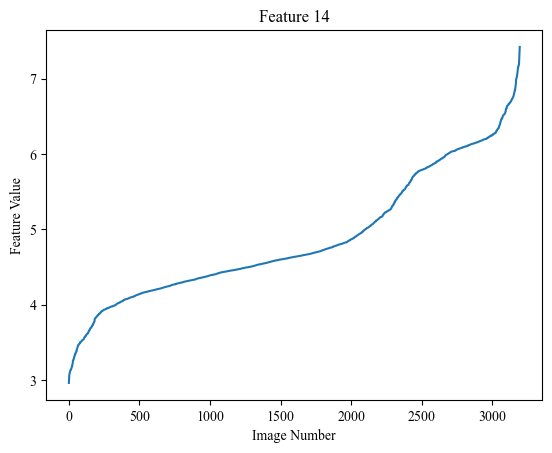

In [26]:
OCTfeatarray=np.array(featlist)
HOCTfeatarray=OCTfeatarray[:,0,:]
OCTorderedfeats= Texture_Functions.orderims(HOCTfeatarray)

#Select a feature to look at the images for by adjusting the feature number below-
featurenumber=9
OCToset=OCTorderedfeats[featurenumber-1]


Number of iamges in linear sampling-  55


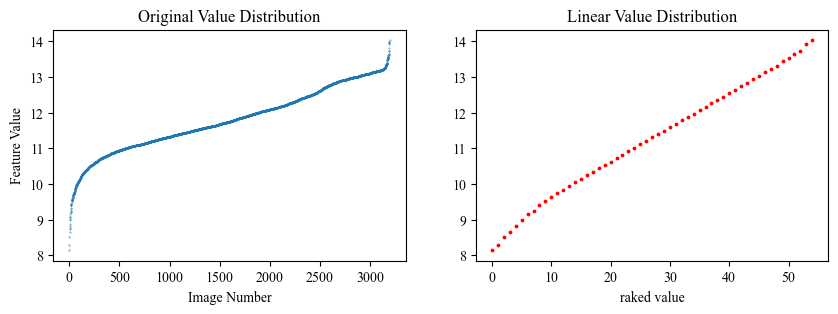

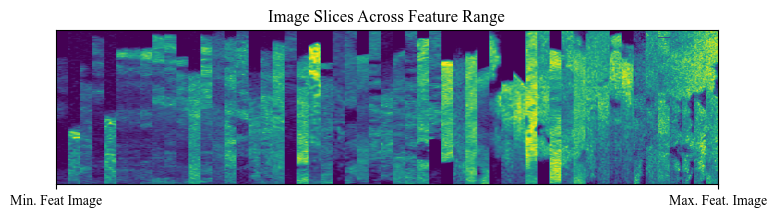

<Figure size 40000x8000 with 0 Axes>

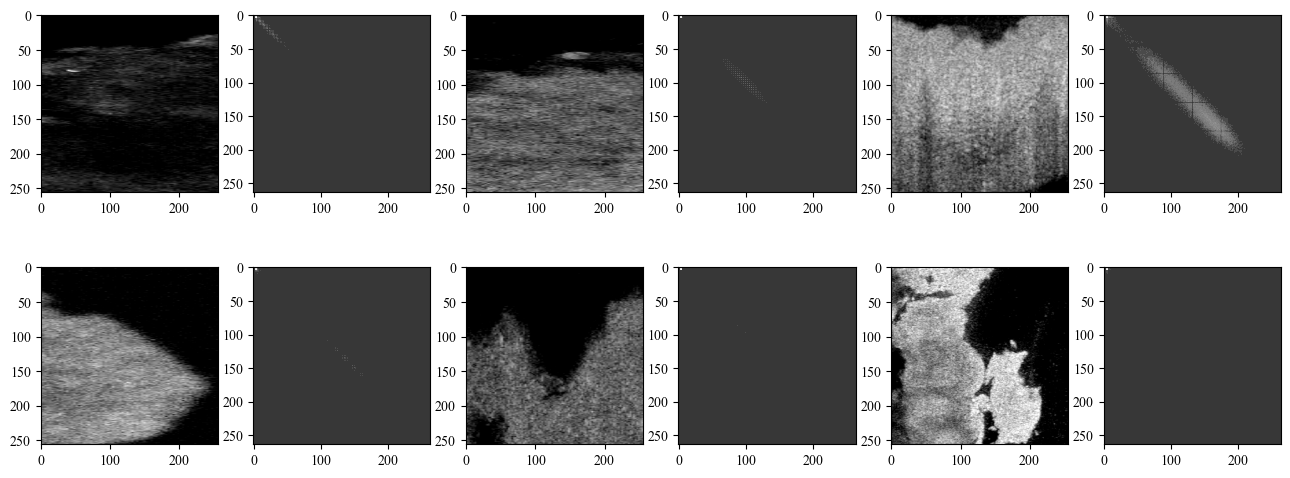

<Figure size 40000x8000 with 0 Axes>

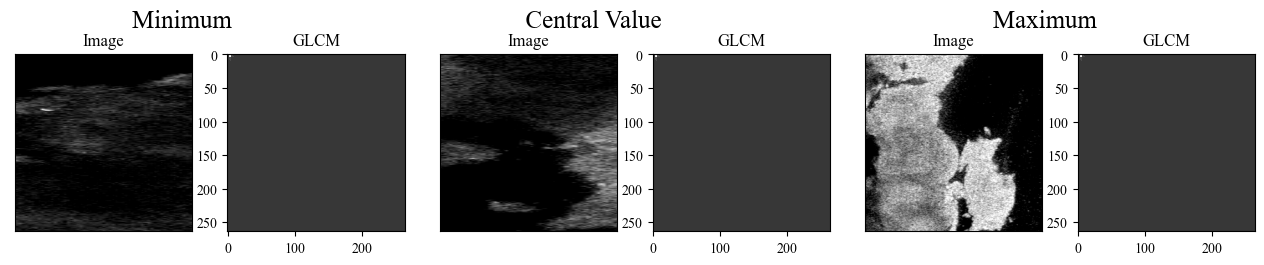

In [51]:
lnum=0.0194
Texture_Functions.linearsampling(OCToset, lnum, imageset, mode="oct", indlist=indexlist, imsize=256)

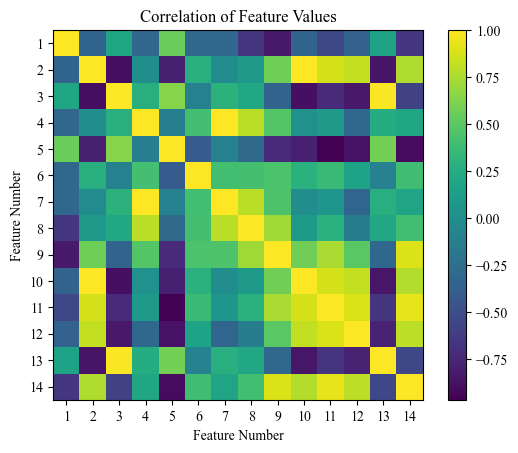

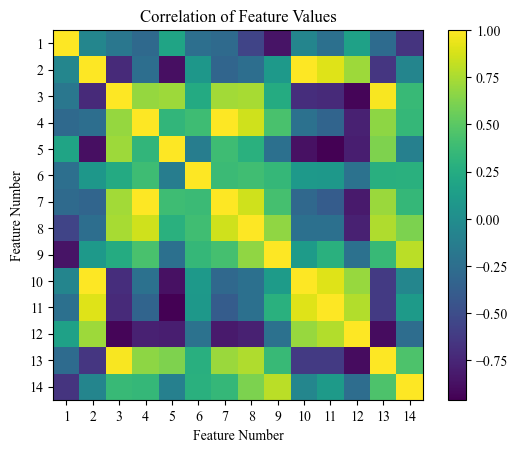

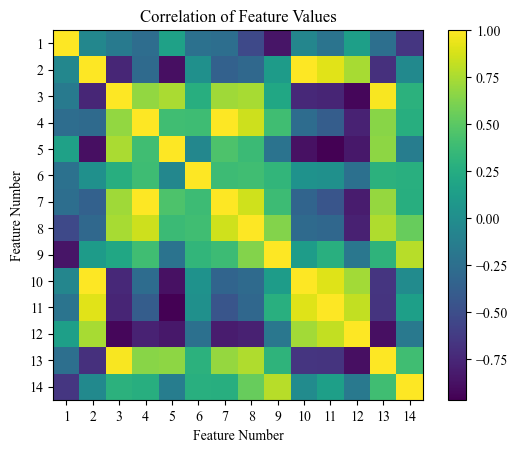

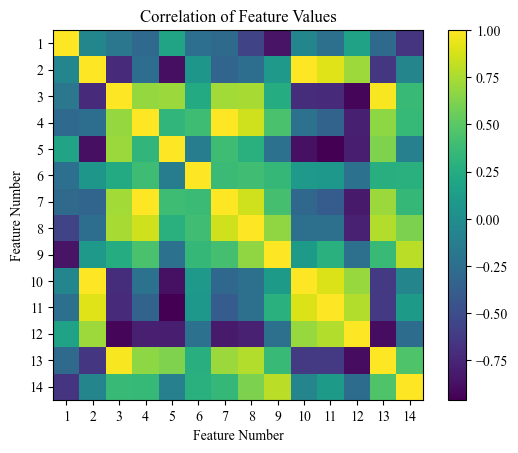

()

In [57]:
Texture_Functions.corbydirection(OCTfeatarray)

## Slide Data

In [59]:
#working with downloaded image set-
dir_path = r"C:\Users\justinamb\Desktop\TextureCode\Images\SlideTestSet\PreprocessedIms"

# Change the directory 
os.chdir(dir_path) 

imageset=[]
# iterate through all file 
for file in os.listdir(): 
    pic = np.array(io.imread(file))
    imageset.append(pic)
    

In [61]:
featlist=[]
indexlist=[]
for f in range(len(imageset)):
    imup=imageset[f]
   
    maxval=np.max(imup)
    imup=np.where(imup==maxval,0,imup)
    
    maxval=np.max(imup)
    imup=np.where(imup<10,0,imup)
    
    #Gonna divide it up into chunks-
    squaresize=300
    for j in range(int(np.floor(imup.shape[0]/squaresize))):
        for k in range(int(np.floor(imup.shape[1]/squaresize))):
            chunk=imup[j*squaresize:(j+1)*squaresize,k*squaresize:(k+1)*squaresize]
            chunk = chunk.astype(np.uint8)
            #Check to see how many zeros there are-
            if np.count_nonzero(chunk==0)<60000:
                #Check for oversaturation-
                oversatchtestchunk=chunk+1
                oversatchtestchunk=np.where(oversatchtestchunk==256,0,oversatchtestchunk)           
                if np.count_nonzero(oversatchtestchunk==0)<1000:
                    features=mahotas.features.haralick(chunk, preserve_haralick_bug=False, compute_14th_feature=True, ignore_zeros=True, use_x_minus_y_variance=True)
                    featlist.append(features)
                    indexochunk=[f,j,k]
                    indexlist.append(indexochunk)
                    
HEfeatarray=np.array(featlist)

(87, 4, 14)
8


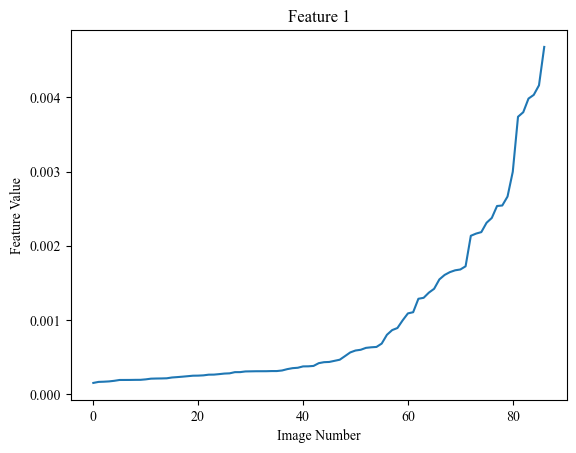

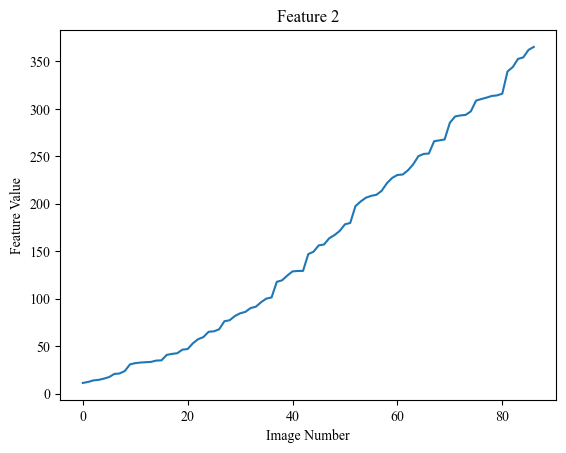

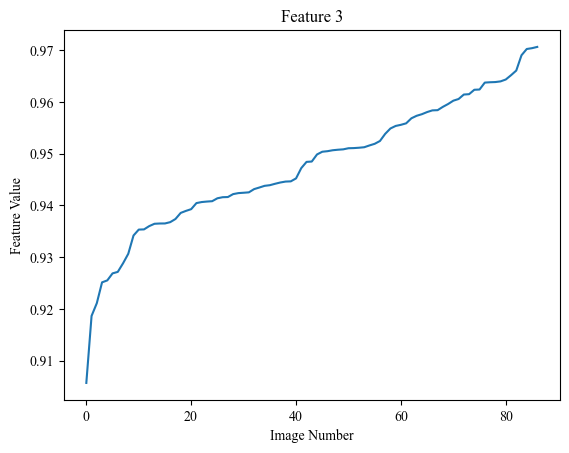

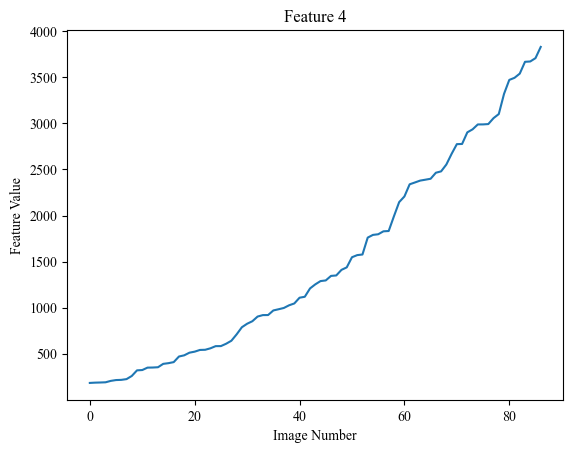

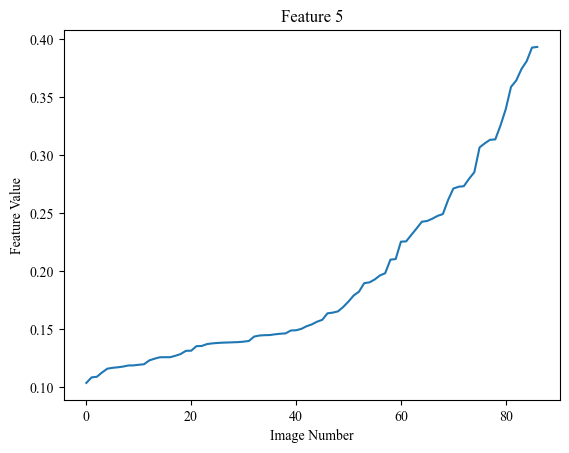

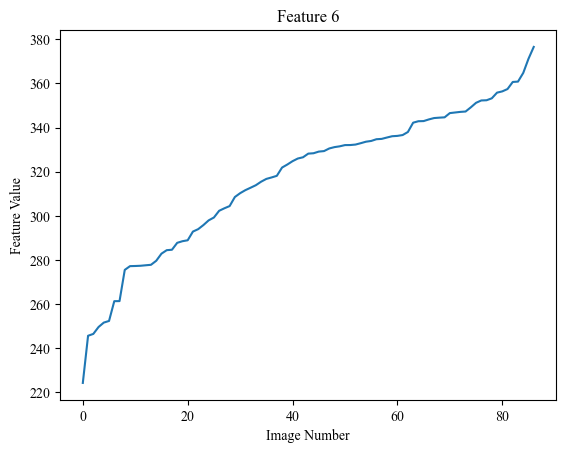

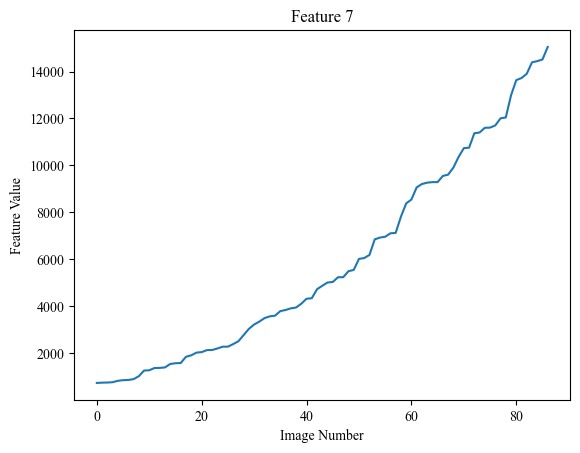

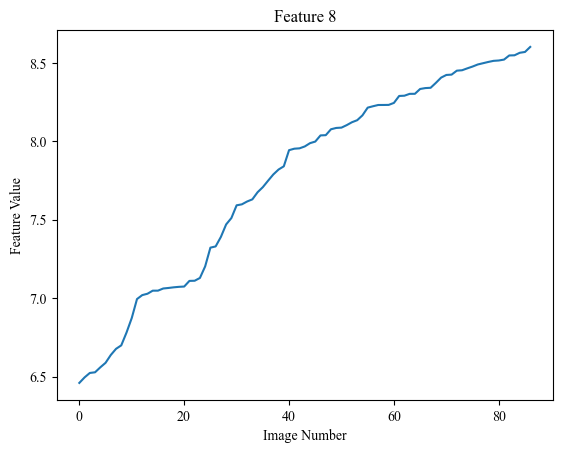

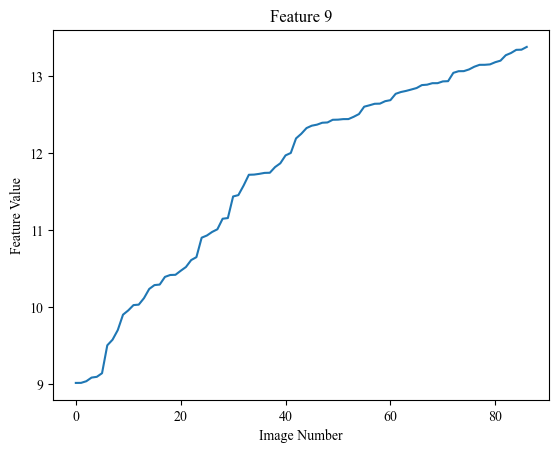

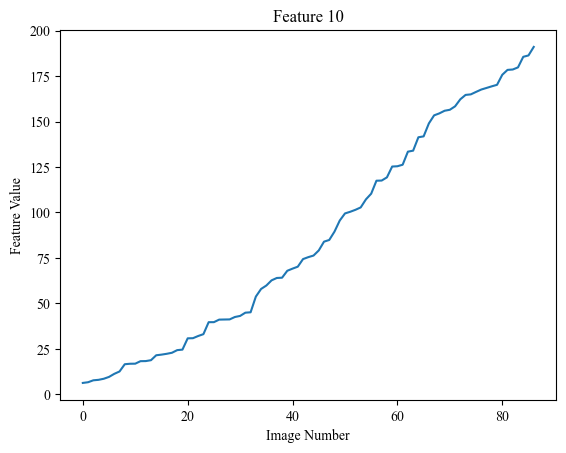

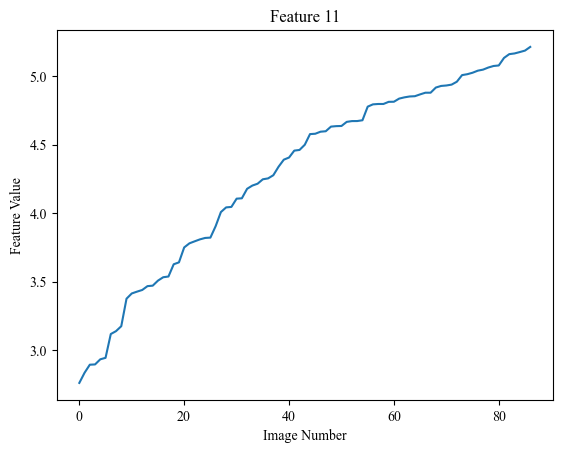

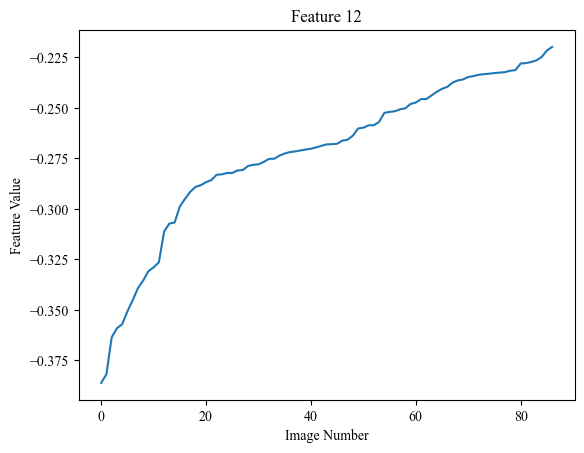

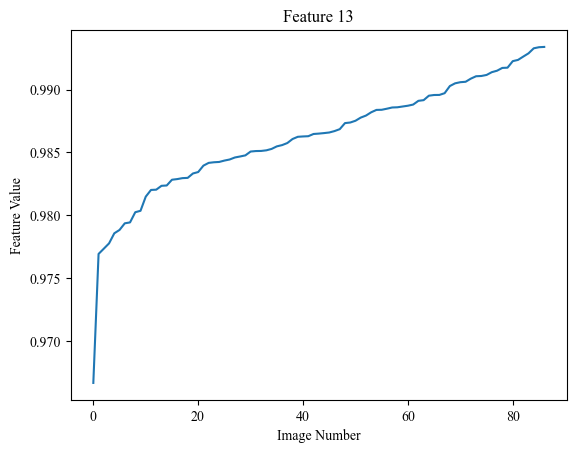

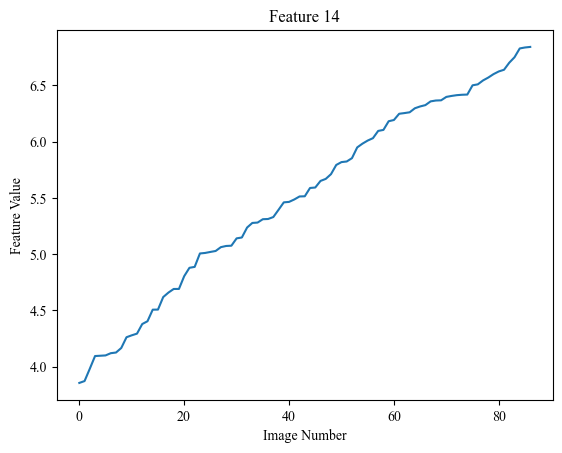

In [62]:
HHEfeatarray=HEfeatarray[:,0,:]
HEorderedfeats= Texture_Functions.orderims(HHEfeatarray)

#Select a feature to look at the images for by adjusting the feature number below-
featurenumber=9
HEoset=HEorderedfeats[featurenumber-1]


Number of iamges in linear sampling-  27


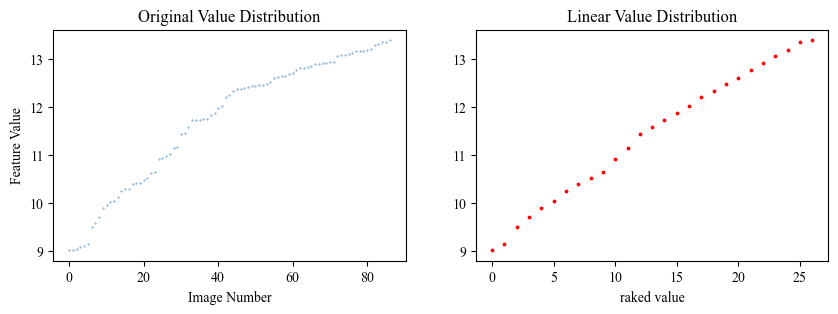

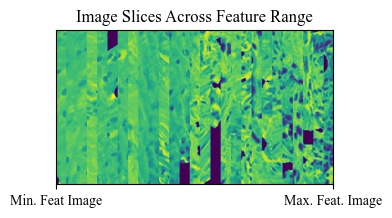

<Figure size 40000x8000 with 0 Axes>

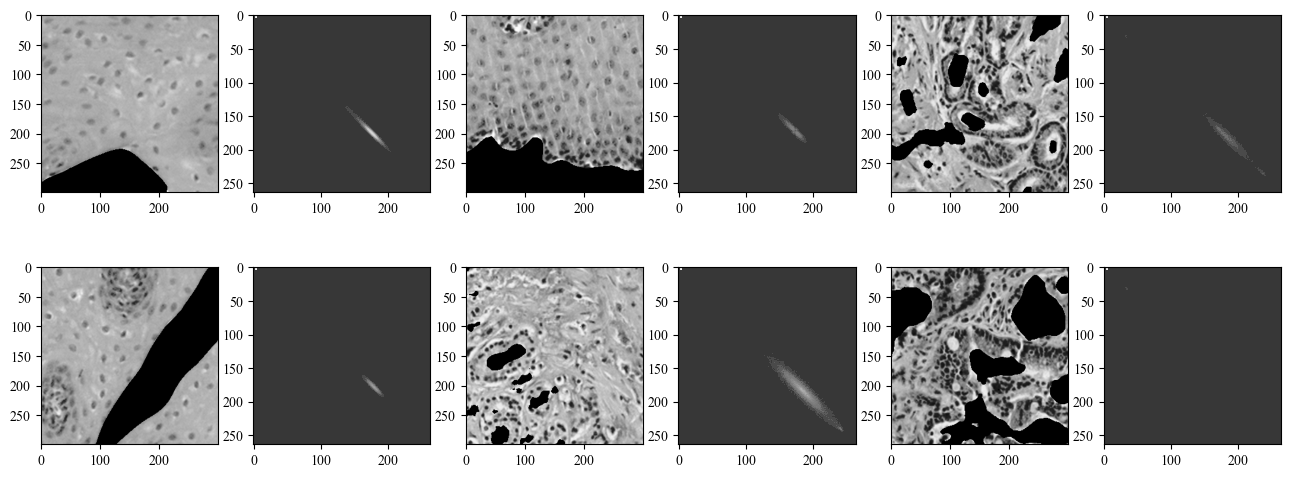

<Figure size 40000x8000 with 0 Axes>

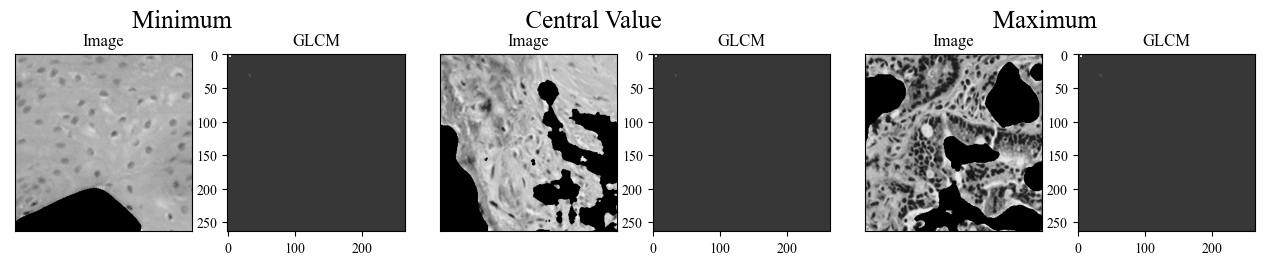

In [65]:
lnum=0.4
Texture_Functions.linearsampling(HEoset, lnum, imageset, mode="he", indlist=indexlist, imsize=300)

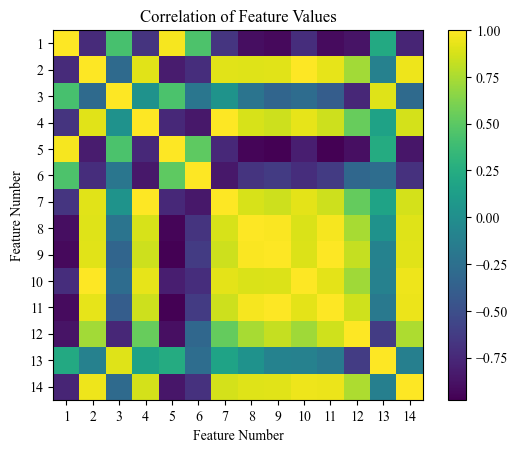

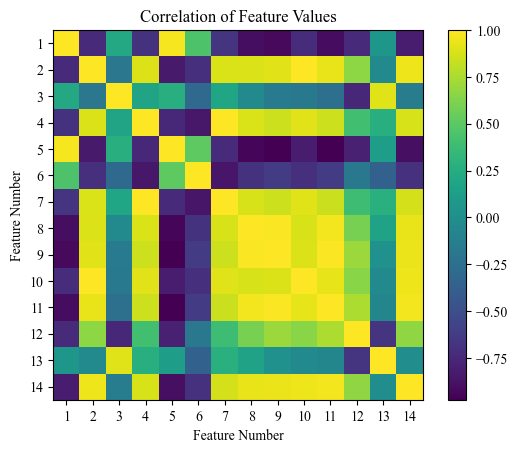

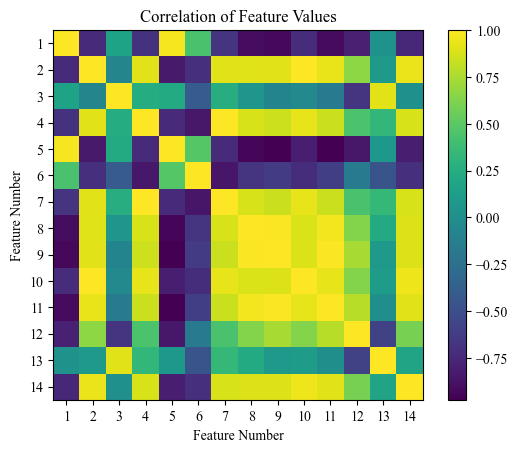

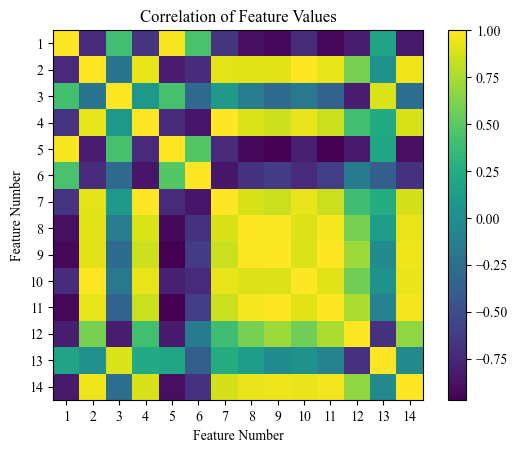

()

In [66]:
Texture_Functions.corbydirection(HEfeatarray)

## Comparing different feature distributions-

In [ ]:
#Comparing multiple datasets' parameter ranges-

#Can assign ordered features to different variables and rerun with different datasets- 
#orderedfeatsNormal=orderedfeats
#orderedfeatsCancer=orderedfeats
#orderedfeatsMeta=orderedfeats
#orderedfeatsAdeno=orderedfeats
#orderedfeatsBar=orderedfeats

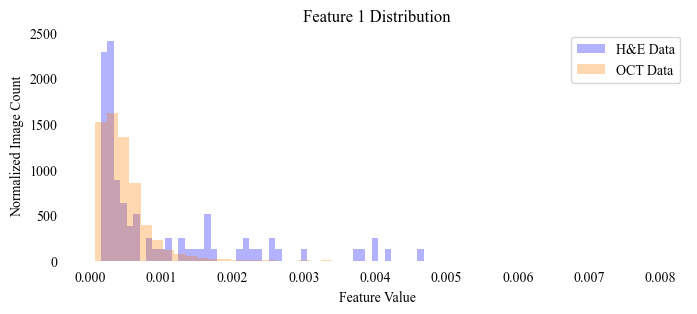

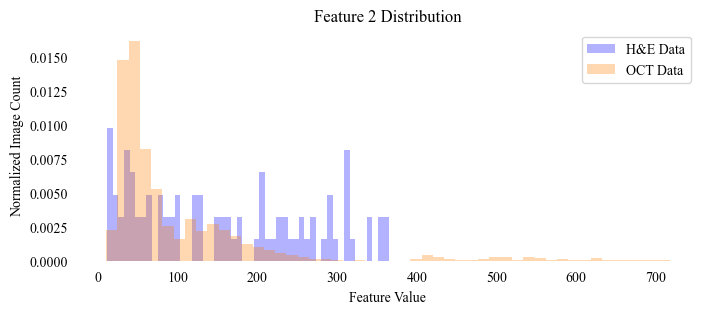

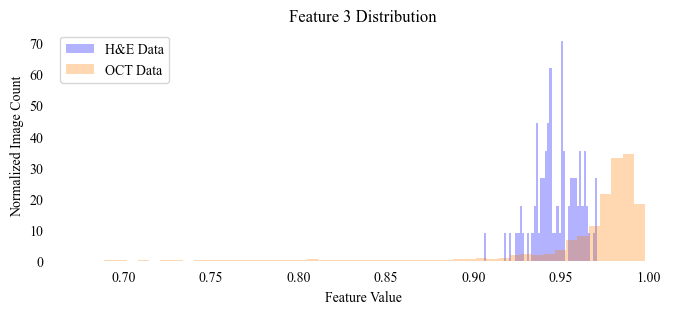

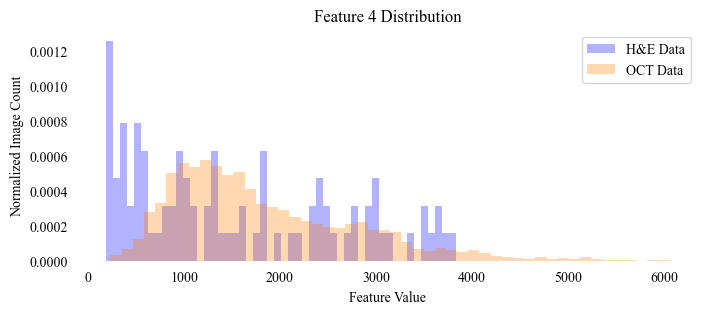

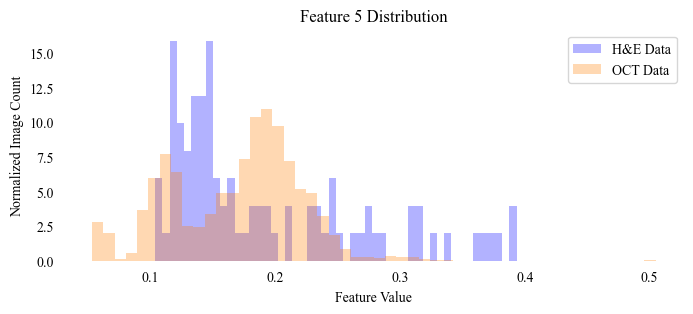

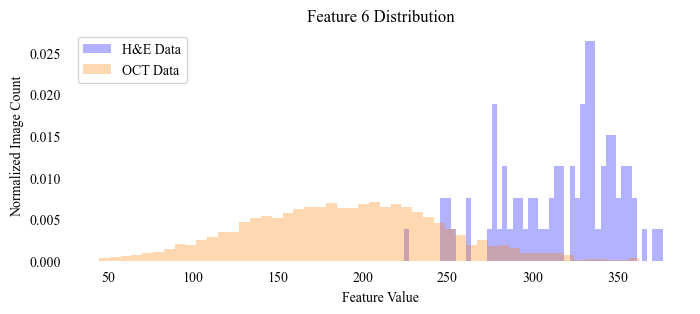

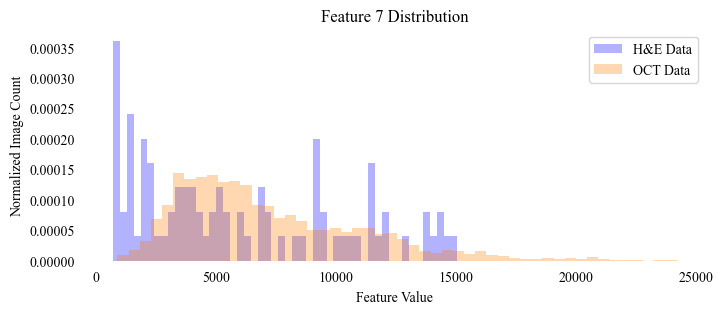

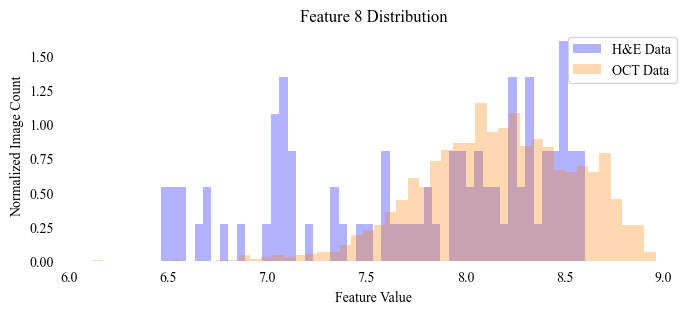

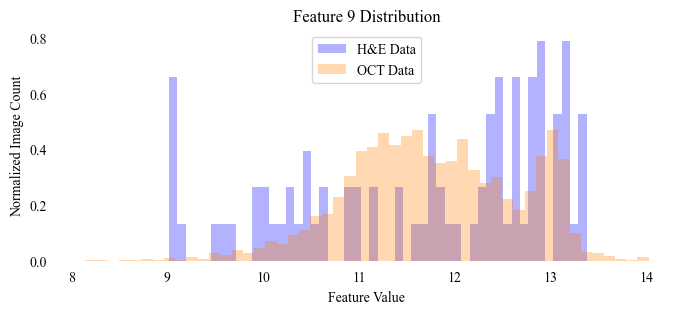

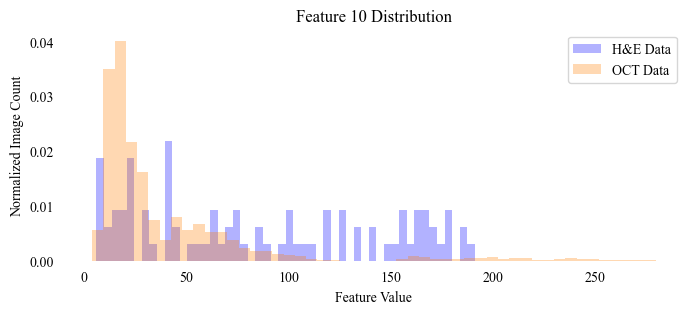

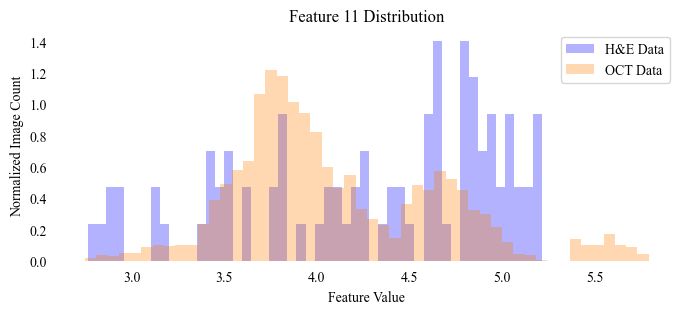

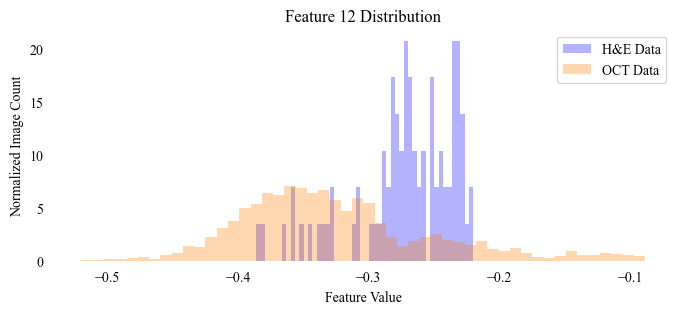

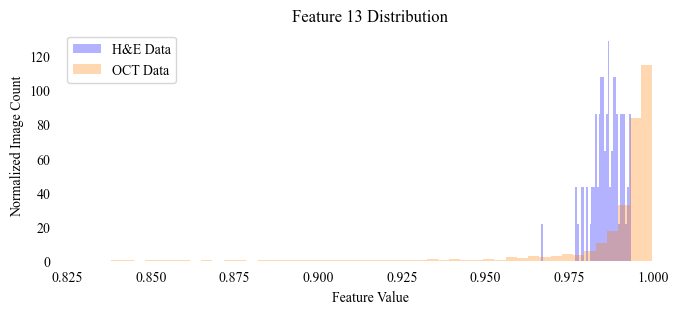

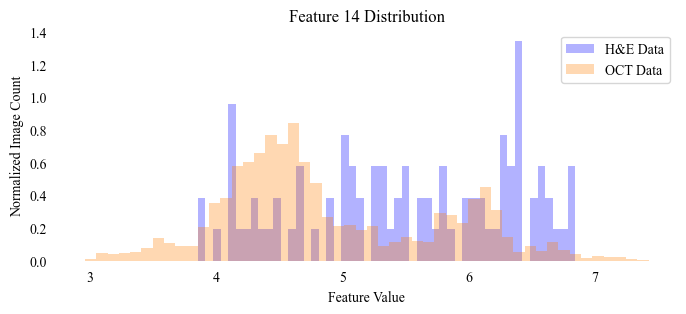

In [67]:
#Making one histogram for each feature
for i in range(14):
    fig, ax = plt.subplots(figsize = (8,3))
    ax.hist(HEorderedfeats[i][:,1], bins=50, density=True, color=(0, 0, 1, 0.3), label="H&E Data")
    ax.hist(OCTorderedfeats[i][:,1], bins=50, density=True, color=(1, 0.5, 0, 0.3), label="OCT Data")
    ax.set_xlabel("Feature Value")
    ax.set_ylabel("Normalized Image Count")
    ax.set_title("Feature "+str(i+1)+" Distribution")
    ax.tick_params(left = False, bottom = False)
    ax.legend()
    for ax, spine in ax.spines.items():
        spine.set_visible(False)
    plt.show() 